In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.linear_model import Perceptron
import numpy as np

### 单层感知机通过花瓣长度、宽度两个特征实现对鸢尾花品种的分类

In [29]:
#将数据代入超平面中判断数据相对于超平面的位置
def d(x,w,b):
    return np.dot(w,x)+b

In [30]:
def sign(x,w,b):
    #在超平面法向量的正方向
    if d(x,w,b)>=0:
        return 1
    #在超平面法向量的负方向
    else:
        return -1

In [31]:
#计算决策边界的评分
def clf_score(X,y,w,b):
    score=0
    for xi,yi in zip(X,y):
        score=score+yi*sign(xi,w,b)
    return score

In [32]:
#载入iris数据集
iris=datasets.load_iris()

In [33]:
#观察数据形态
print(iris.data.shape)
print(iris.target.shape)

(150, 4)
(150,)


In [34]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### 说明该数据集含有150个数据

In [35]:
#取前面100个数据的最后两个特征（花瓣长度和花瓣宽度）,这是线性可分数据集
sampleCount=100
X1=iris.data[:sampleCount,[2,3]]
y1=iris.target[:sampleCount]

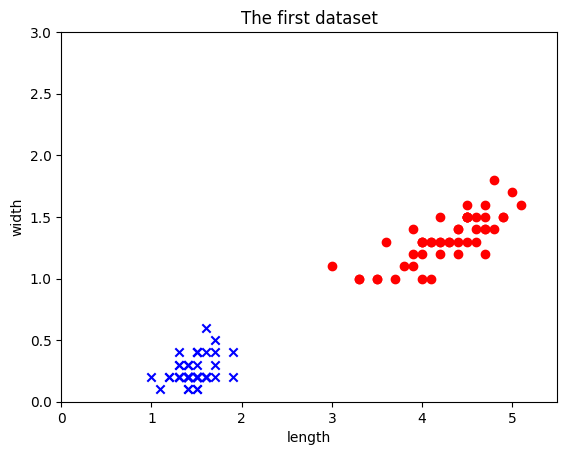

In [36]:
plt.scatter(X1[:50,0],X1[:50,1],marker='x',c='b')
plt.scatter(X1[50:,0],X1[50:,1],marker='o',c='r')
plt.title("The first dataset")
plt.ylabel("width")
plt.xlabel("length")

plt.axis([0,5.5,0,3])
plt.show()

In [37]:
i=0
#修改一下标签
while i<50:
    y1[i]=-1
    i=i+1

In [38]:
y1

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [39]:
#迭代次数
epoches=2000
#初始化w,b
set_w,set_b=np.array([0,0]),0
best_w,best_b=np.array([0,0]),0
best_score=0

for _ in range(epoches):
    #顺序遍历数据集X
    for xi,yi in zip(X1,y1):
        #发现对标签为yi的xi向量分错了
        if yi*d(xi,set_w,set_b)<=0:
            #对w,b进行相应的更新
            #如果yi=1则进行向量加法更新w，平行四边形法则使得新的w在原两个向量的中间，即更接近xi
            #如果yi=-1则进行向量减法更新w(即加上-xi)，平行四边形法则使得新的w与-xi夹角变小(与xi夹角更大)
            set_w=set_w+yi*xi
            set_b=set_b+yi
            #更新完再次评分，若效果好则更新相应的best_w,b
            score=clf_score(X1,y1,set_w,set_b)
            if score>best_score:
                print(score)
                best_score=score
                best_w=set_w
                best_b=set_b
            break#每次循环最多只更新一次w,b
#下面的画图操作是用w,b故而用最优值更新w,b
w,b=best_w,best_b
print(w,b)

100
[0.5 0.8] -2


接下来绘制超平面

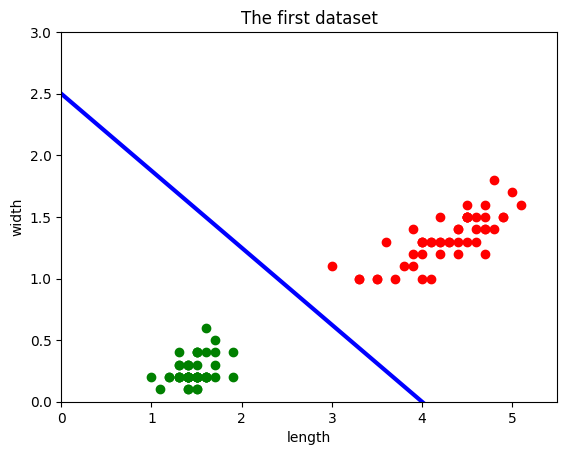

In [40]:
plt.scatter(X1[:50,0],X1[:50,1],marker='o',c='g')
plt.scatter(X1[50:,0],X1[50:,1],marker='o',c='r')
plt.title("The first dataset")
plt.ylabel("width")
plt.xlabel("length")

plt.axis([0,5.5,0,3])
K=-1*(w[0]/w[1])
B=-1*(b/w[1])
plt.plot([0,10],[B,10*K+B],linewidth=3,color='b')
plt.show()

In [41]:
# 取后面100个数据（即后两个类别），并且只取最后两个特征，这是非线性可分数据集
X2 = iris.data[50:50+sampleCount, [2,3]]
y2 = iris.target[50:50+sampleCount]
i=50
#修改一下标签
while i<len(y2):
    y2[i]=-1
    i=i+1

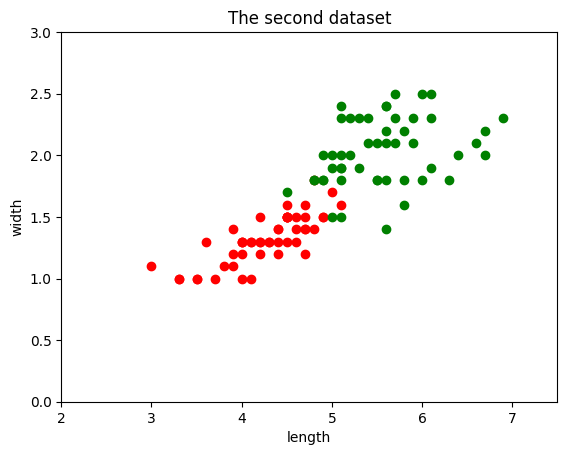

In [42]:
plt.scatter(X2[:50,0],X2[:50,1],marker='o',c='r')
plt.scatter(X2[50:,0],X2[50:,1],marker='o',c='g')
plt.title("The second dataset")
plt.ylabel("width")
plt.xlabel("length")

plt.axis([2,7.5,0,3])
plt.show()

#### 接下来利用单层感知机对上述数据进行线性分类

In [43]:
#迭代次数
epoches=2000
#初始化w,b
set_w,set_b=np.array([0,0]),0
best_w,best_b=np.array([0,0]),0

In [44]:
best_score=0
for _ in range(epoches):
    #顺序遍历数据集X
    for xi,yi in zip(X2,y2):
        #发现对标签为yi的xi向量分错了
        if yi*d(xi,set_w,set_b)<=0:
            #对w,b进行相应的更新
            #如果yi=1则进行向量加法更新w，平行四边形法则使得新的w在原两个向量的中间，即更接近xi
            #如果yi=-1则进行向量减法更新w(即加上-xi)，平行四边形法则使得新的w与-xi夹角变小(与xi夹角更大)
            set_w=set_w+yi*xi
            set_b=set_b+yi
            #更新完再次评分，若效果好则更新相应的best_w,b
            score=clf_score(X2,y2,set_w,set_b)
            if score>best_score:
                print(score)
                best_score=score
                best_w=set_w
                best_b=set_b
            break#每次循环最多只更新一次w,b
#下面的画图操作是用w,b故而用最优值更新w,b
w,b=best_w,best_b
print(w,b)

12
60
68
70
72
76
78
80
82
84
86
[ 12.5 -98.9] 102


In [45]:
#准确率=1-分错率
accuracy = 1 - (sampleCount-best_score)/2/sampleCount
print(f"准确率为{accuracy}")

准确率为0.9299999999999999


接下来绘制超平面

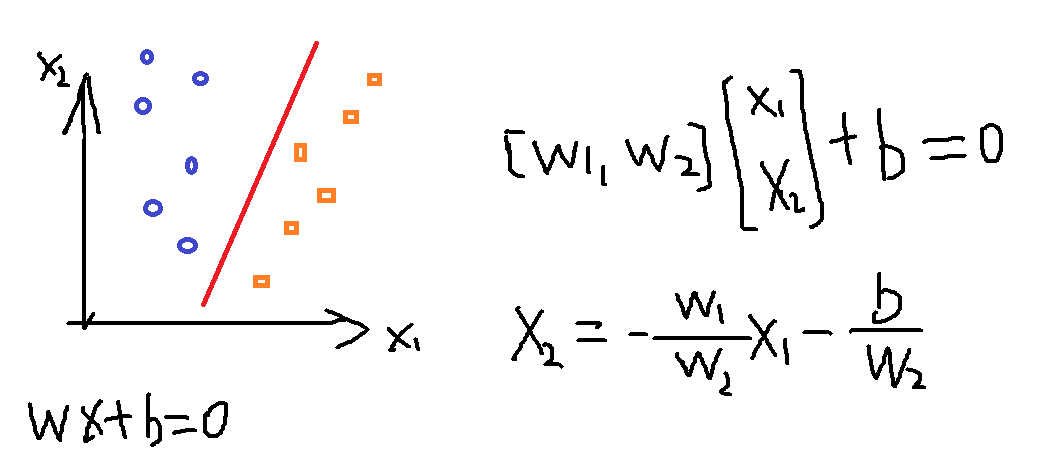

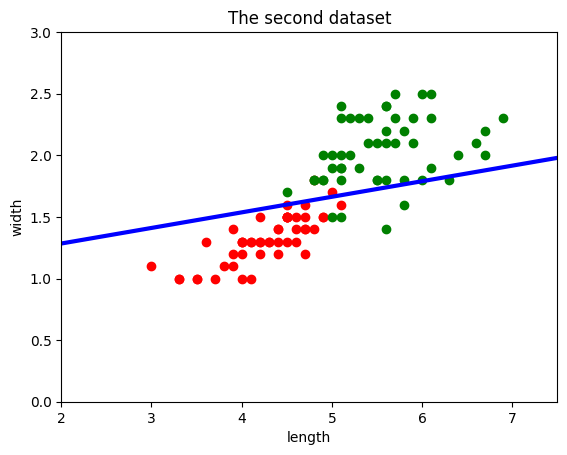

In [46]:
plt.scatter(X2[:50,0],X2[:50,1],marker='o',c='r')
plt.scatter(X2[50:,0],X2[50:,1],marker='o',c='g')
plt.title("The second dataset")
plt.ylabel("width")
plt.xlabel("length")

plt.axis([2,7.5,0,3])
K=-1*(w[0]/w[1])
B=-1*(b/w[1])
plt.plot([0,10],[B,10*K+B],linewidth=3,color='b')
plt.show()